
*   Rahul choudary Movva
*   Sreepradh Dingari
*   Sourima Dey




In [119]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving datasets.py to datasets (18).py


{'datasets.py': b'import numpy as np\n\n\nclass MNISTDataset:\n    """\'Bare minimum\' class to wrap MNIST numpy arrays into a dataset."""\n    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,\n                 to01=True, shuffle=True, seed=None):\n        """\n        Use seed optionally to always get the same shuffling (-> reproducible\n        results).\n        """\n        self.batch_size = batch_size\n        self.train_data = train_imgs\n        self.train_labels = train_lbs.astype(np.int32)\n        self.test_data = test_imgs\n        self.test_labels = test_lbls.astype(np.int32)\n\n        if to01:\n            # int in [0, 255] -> float in [0, 1]\n            self.train_data = self.train_data.astype(np.float32) / 255\n            self.test_data = self.test_data.astype(np.float32) / 255\n\n        self.size = self.train_data.shape[0]\n\n        if seed:\n            np.random.seed(seed)\n        if shuffle:\n            self.shuffle_train()\n        

In [120]:
from datasets import MNISTDataset

In [121]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

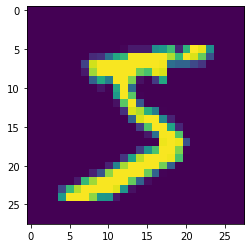

In [122]:
plt.imshow(train_images[0])
train_images[0]

In [123]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [124]:
train_steps = 1000
learning_rate = 0.1

W_h=tf.Variable(tf.random.truncated_normal([784,60], mean=0.0, stddev=0.10, dtype=tf.dtypes.float32, seed=None, name=None))
b_h= tf.Variable(tf.random.truncated_normal( [60], mean=0.0, stddev=0.10, dtype=tf.dtypes.float32, seed=None, name=None))
W_o=tf.Variable(tf.random.truncated_normal([60,10], mean=0.0, stddev=0.10, dtype=tf.dtypes.float32, seed=None, name=None))
b_o= tf.Variable(tf.random.truncated_normal( [10], mean=0.0, stddev=0.10, dtype=tf.dtypes.float32, seed=None, name=None))


for step in range(train_steps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as tape:
     logits_1 = (tf.matmul(img_batch, W_h) + b_h)
     logits_5=tf.nn.relu(features=logits_1,name=None)
     logits_2 = (tf.matmul(logits_5, W_o) + b_o)
     xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits_2, labels=lbl_batch))
  
     grads = tape.gradient(xent, [W_o,b_o,W_h,b_h])
     W_o.assign_sub(learning_rate * grads[0])
     b_o.assign_sub(learning_rate * grads[1])
     W_h.assign_sub(learning_rate * grads[2])
     b_h.assign_sub(learning_rate * grads[3])

  if not step % 100:
      print(step)
      preds = tf.argmax(logits_2, axis=1, output_type=tf.int32)
      acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
      print("Loss: {} Accuracy: {}".format(xent, acc))    





 

0
Loss: 2.3522772789001465 Accuracy: 0.1015625
100
Loss: 0.518645703792572 Accuracy: 0.828125
200
Loss: 0.4998992681503296 Accuracy: 0.8359375
300
Loss: 0.4054175615310669 Accuracy: 0.8671875
400
Loss: 0.4683244526386261 Accuracy: 0.8359375
Starting new epoch...
500
Loss: 0.31245797872543335 Accuracy: 0.9375
600
Loss: 0.2810329794883728 Accuracy: 0.9140625
700
Loss: 0.3782901167869568 Accuracy: 0.890625
800
Loss: 0.2451891005039215 Accuracy: 0.90625
900
Loss: 0.47151023149490356 Accuracy: 0.8828125
Starting new epoch...


This is test set accuracy calculation:-


In [125]:
test_preds_h = tf.matmul(data.test_data, W_h) + b_h
test_preds = tf.argmax(tf.matmul(test_preds_h, W_o) + b_o, axis=1,
                       output_type=tf.int32)                     
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print('test accuracy:',acc)

test accuracy: tf.Tensor(0.8893, shape=(), dtype=float32)
